## WeatherPy - Analysis Report

Note: Latitude values are measured relative to the equator and range from -90° at the South Pole to +90° at the North Pole. 

<b>Trends Observed:</b>

<u>Latitude vs. Max Temperature:</u>
The maximum temperature seems to be highest for cities located on or around the equator (the line of 0 latitude). The cities around the South Pole (Southern Hemisphere) seem to be warmer than the cities around the North Pole (Northern Hemisphere).

<u>Latitude vs. Humidity:</u>
Majority of cities analyzed tend to have humidity between 60 and 100 percent. A big cluster of cities in Northern Hemisphere (between latitude 40 to 70) has a humidity % of 65 and above. 

<u>Latitude vs. Cloudiness:</u>
There does not seem to be any particular relationship between the latitude and the cloudiness %. However, there are bands of cities at 0%, 20%, 40%, 78% and 100% of cloudiness (throughout Northern and Southern hemisphere).

<u>Latitude vs. Wind Speed:</u>
The wind speed appears to be between 0 and 20 mph for most of the cities across the northern and southern hemisphere with few cities in the Southern Hemisphere having very high wind speed of above 25 mph.  



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from bokeh.plotting import figure, show, output_file, ColumnDataSource, output_notebook, save
from bokeh.models import HoverTool 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# function to call weather API and get the weather data for each city

def get_current_weather(api_key, city, unit):
    
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        'appid': api_key,
        'q': city,
        'units': unit
    }
    
    weather_response = requests.get(url, params = payload)
    
    if weather_response.status_code == 200:
        print(f'Processing Record {cities.index(city)} | {city}')
        return weather_response.json() 
    else:
        print('City Not Found. Skipping..')
        return None

  

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv

In [4]:
# calling the 'get_current_weather' function for each city and storing the result in a list

all_cities = []
unit = 'imperial'

print('Beginning Data Retrieval')
print('--------------------------')

for city in cities:
    city_data = get_current_weather(api_key, city, unit)
    
    # None(returned from the function) is equivalent to False
    if city_data:                                  
        all_cities.append(city_data)
        
print('--------------------------')
print('Data Retrieval Complete')
print('--------------------------')

Beginning Data Retrieval
--------------------------
Processing Record 0 | vestmanna
Processing Record 1 | punta arenas
Processing Record 2 | kapaa
Processing Record 3 | kubuta
Processing Record 4 | touros
Processing Record 5 | mandalgovi
Processing Record 6 | barrow
Processing Record 7 | murashi
Processing Record 8 | porto novo
Processing Record 9 | port hardy
Processing Record 10 | georgetown
Processing Record 11 | east london
Processing Record 12 | sydney
Processing Record 13 | mahebourg
Processing Record 14 | mataura
Processing Record 15 | port lavaca
Processing Record 16 | kodiak
Processing Record 17 | kavieng
Processing Record 18 | kangaatsiaq
Processing Record 19 | bluff
Processing Record 20 | chuy
Processing Record 21 | ponta do sol
Processing Record 22 | upernavik
Processing Record 23 | atuona
Processing Record 24 | albany
Processing Record 25 | jamestown
Processing Record 26 | bethel
Processing Record 27 | ribeira grande
Processing Record 28 | lexington park
Processing Record 

In [5]:
# exporting the city data into a dataframe and displaying the dataframe

city_weather_df = pd.DataFrame([{
    'City': citi['name'],
    'Country': citi['sys']['country'],
    'Date': citi['dt'],
    'Cloudiness': citi['clouds']['all'],
    'Humidity': citi['main']['humidity'],
    'Lat': citi['coord']['lat'],
    'Lng': citi['coord']['lon'],
    "Temp": citi["main"]["temp"],
    'Min Tem': citi["main"]["temp_min"],
    'Max Temp': citi["main"]["temp_max"],
    'Wind Speed': citi['wind']['speed']
    
} for citi in all_cities])

city_weather_df

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Temp,Min Tem,Max Temp,Wind Speed
0,Vestmanna,FO,1578419922,94,70,62.16,-7.17,44.60,44.60,44.60,27.51
1,Punta Arenas,CL,1578419922,100,48,-53.16,-70.91,59.92,59.00,60.80,9.17
2,Kapaa,US,1578419922,40,83,22.08,-159.32,72.86,69.80,75.20,19.46
3,Kubuta,NG,1578419923,56,36,12.03,8.66,77.00,77.00,77.00,10.29
4,Touros,BR,1578419589,20,55,-5.20,-35.46,89.60,89.60,89.60,18.34
...,...,...,...,...,...,...,...,...,...,...,...
557,Bezhetsk,RU,1578420021,98,96,57.78,36.69,31.23,31.23,31.23,6.98
558,Koutsouras,GR,1578420021,100,80,35.03,25.95,48.00,48.00,48.00,17.00
559,Kailua,US,1578420021,40,73,21.39,-157.74,73.45,68.00,75.20,16.11
560,Impfondo,CD,1578420021,0,32,1.62,18.06,84.40,84.40,84.40,2.19


In [6]:
# generating the count of each column
city_weather_df.count()

City          562
Country       562
Date          562
Cloudiness    562
Humidity      562
Lat           562
Lng           562
Temp          562
Min Tem       562
Max Temp      562
Wind Speed    562
dtype: int64

In [7]:
# exporting the city data into a csv
city_weather_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
# Plotting using BOKEH

output_notebook()
source_temp = ColumnDataSource(city_weather_df)

p = figure(plot_height=330, width=450, title = f'City Latitude vs. Max Temperature ({date.today()})',
           x_axis_label='Latitude', y_axis_label='Max Temperature (F)')

p.circle('Lat', 'Max Temp', source=source_temp, size=7, fill_color='grey', line_color='black')

p.add_tools(HoverTool())
p.yaxis.axis_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = "10pt"
p.title.text_font_size = '11pt'
p.title.align = 'center'

show(p)

Loading BokehJS ...

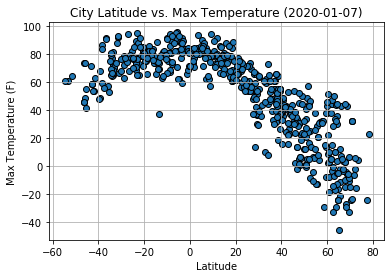

In [9]:
# Plotting using Matplotlib

plt.scatter(city_weather_df['Lat'], city_weather_df['Max Temp'], ec='black'),
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date.today()})')

plt.savefig('City Latitude vs. Max Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

In [10]:
# Plotting using BOKEH

output_notebook()
source_temp = ColumnDataSource(city_weather_df)

p = figure(plot_height=330, width=450, title = f'City Latitude vs. Humidity ({date.today()})',
           x_axis_label='Latitude', y_axis_label='Humidity (%)')

p.circle('Lat', 'Humidity', source=source_temp, size=7, fill_color='grey', line_color='black')

p.add_tools(HoverTool())
p.yaxis.axis_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = "10pt"
p.title.text_font_size = '11pt'
p.title.align = 'center'

show(p)

Loading BokehJS ...

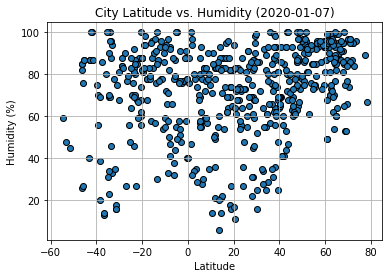

In [11]:
# plotting usign Matplotlib

plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], ec='black'),
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date.today()})')

plt.savefig('City Latitude vs. Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

In [12]:
# Plotting using BOKEH

output_notebook()
source_temp = ColumnDataSource(city_weather_df)

p = figure(plot_height=330, width=450, title = f'City Latitude vs. Cloudiness ({date.today()})',
           x_axis_label='Latitude', y_axis_label='Cloudiness (%)')

p.circle('Lat', 'Cloudiness', source=source_temp, size=7, fill_color='grey', line_color='black')

p.add_tools(HoverTool())
p.yaxis.axis_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = "10pt"
p.title.text_font_size = '11pt'
p.title.align = 'center'

show(p)

Loading BokehJS ...

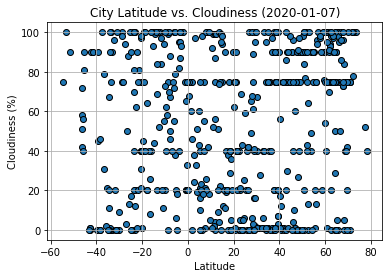

In [13]:
# plotting using Matplotlib

plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], ec='black')
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')

plt.savefig('City Latitude vs. Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

In [14]:
# Plotting using BOKEH

output_notebook()
source_temp = ColumnDataSource(city_weather_df)

p = figure(plot_height=330, width=450, title = f'City Latitude vs. Wind Speed ({date.today()})',
           x_axis_label='Latitude', y_axis_label='Wind Speed (mph)')

p.circle('Lat', 'Wind Speed', source=source_temp, size=7, fill_color='grey', line_color='black')

p.add_tools(HoverTool())
p.yaxis.axis_label_text_font_size = "10pt"
p.xaxis.axis_label_text_font_size = "10pt"
p.title.text_font_size = '11pt'
p.title.align = 'center'

show(p)

Loading BokehJS ...

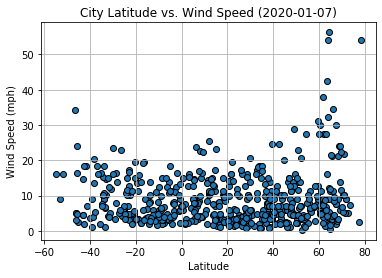

In [15]:
# plotting using Matplotlib

plt.scatter(city_weather_df['Lat'], city_weather_df['Wind Speed'], ec='black'),
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')

plt.savefig('City Latitude vs. Wind Speed.png')
plt.show()